In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import json

'''
All of the packages, libraries and extended functionalites needed for this notebook
are readily available on Google Colab, I highly recommend running this notebook on Google Colab
so you don't have to install new packages and resolve dependencies, just in case the libraries needed
are not supported by your version or distribution of Python.
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import urllib
from pathlib import Path
from PIL import Image

import torch
import torchvision
#from torchvision.io.image import read_image

# for semantic segmentation
from torchvision.io import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
# for object detection
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image


In [ ]:
import csv

# CSV file to save the GPS coordinates with headers
csv_file_path = 'gps_coordinates_with_headers.csv'

# Function to extract GPS coordinates from filename
def extract_gps(filename):
    parts = filename.split('_')
    if len(parts) > 0:
        coords = parts[0].split(',')
        if len(coords) == 2:
            return coords[0].strip(), coords[1].strip()  # Remove any leading/trailing whitespace
    return None, None

# Extract GPS coordinates and write them to a CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Writing headers
    writer.writerow(['latitude', 'longitude'])
    # Writing data
    for item in imgs:
        lat, lon = extract_gps(item['file_name'])
        if lat and lon:
            writer.writerow([lat, lon])  # Write the coordinates as individual elements




In [ ]:
import os
from PIL import Image

cityscape_2k = '/content/drive/MyDrive/advanced_geo_ai/Omnicity_500' # path for Omnicity_500, please replace this to your filepath

## The GPS Coordinates are in the file names, so it is crucial to extract them
image_files = [file for file in os.listdir(cityscape_2k) if file.endswith(('.png', '.jpg', '.jpeg'))]
images = []

## create a list of dictionary where every list element is {filename and image}
for file in image_files:
        img = Image.open(os.path.join(cityscape_2k, file))
        images.append({'filename':file, 'img':img})

In [ ]:
## If we feed all the 500 images to the Mask2Former model at once, it would exceed the RAM provided by Free tier Google Colab
## So we have to break it into 10 smaller datasets each containing 50 images
small_50 = images[:50]
small_100 = images[50:100]
small_150 = images[100:150]
small_200 = images[150:200]
small_250 = images[200:250]
small_300 = images[250:300]
small_350 = images[300:350]
small_400 = images[350:400]
small_450 = images[400:450]
small_500 = images[450:500]


In [ ]:
import requests
import torch
from PIL import Image
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

## Feed the images to the Mask2Former universal segmentation model and get the segmentation result
## Remember to feed them one at a time to not exceed the RAM and crash the session

'''

The function returns a list of dictionaries, with each dictionary containing:
1. filename. we need to extract gpd coords from the filename
2. segmentation. 512 x 512 list representing the pixels. each pixel take a value from 0-18 representing the object occupying the pixel
3. segments_info. Each segmentation instance and what they are.

'''

def classify_imgs(images_dataset):

  rs = []


  processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-cityscapes-panoptic")
  model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-small-cityscapes-panoptic")

  for img in images_dataset:

    inputs = processor(images=img['img'], return_tensors="pt")

    with torch.no_grad():
      outputs = model(**inputs)

      class_queries_logits = outputs.class_queries_logits
      masks_queries_logits = outputs.masks_queries_logits

    result = processor.post_process_panoptic_segmentation(outputs, target_sizes=[img['img'].size[::-1]])[0]
    segmentation = result['segmentation'].tolist()
    segments_info = result['segments_info']
    rs.append({'filename':img['filename'],'segmentaion':segmentation, 'segments_info': segments_info})

  return rs






In [ ]:
model.config.id2label # all the objects the model is trained to recognize

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/276M [00:00<?, ?B/s]

{0: 'road',
 1: 'sidewalk',
 2: 'building',
 3: 'wall',
 4: 'fence',
 5: 'pole',
 6: 'traffic light',
 7: 'traffic sign',
 8: 'vegetation',
 9: 'terrain',
 10: 'sky',
 11: 'person',
 12: 'rider',
 13: 'car',
 14: 'truck',
 15: 'bus',
 16: 'train',
 17: 'motorcycle',
 18: 'bicycle'}

In [ ]:
## feed the image datasets 50 images at a time to not exceed RAM and crash session
rs = classify_imgs(small_50)
rs1 = classify_imgs(small_100)
rs2 = classify_imgs(small_150)
rs3 = classify_imgs(small_200)
rs4 = classify_imgs(small_250)
rs5 = classify_imgs(small_300)
rs6 = classify_imgs(small_350)
rs7 = classify_imgs(small_400)
rs8 = classify_imgs(small_450)
rs9 = classify_imgs(small_500)

`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. N

In [ ]:
## Convert the results into json objects

json_string = json.dumps(rs) ## Manually change the param to rs1 rs2 rs3 rs4 etc to convert them all to json

# Write the JSON string to a file
with open('small_500.json', 'w') as file:
    file.write(json_string)


#After All the results have been converted to Json, we can move on to Results_processing.ipynb to process the json files for the final visualisation.

Visualizing mask for: car


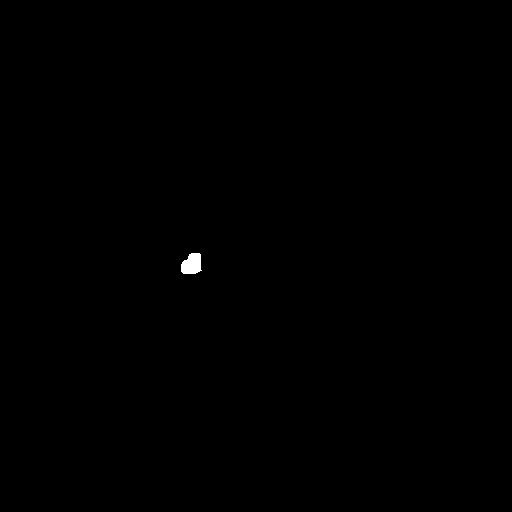

In [ ]:
## The optional visualisation section. You can visualise the results of the image segmentation here.

import numpy as np

def get_mask(segment_id):
  print("Visualizing mask for:", model.config.id2label[segment_to_label[segment_id]])

  mask = (result['segmentation'].numpy() == segment_id)
  visual_mask = (mask * 255).astype(np.uint8)
  visual_mask = Image.fromarray(visual_mask)

  return visual_mask

# note: segment with id == 0 means "background",
# so we visualize segment with id == 1 here
get_mask(segment_id=6)


In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm

def draw_panoptic_segmentation(filename,segmentation, segments_info):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    fig, ax = plt.subplots()
    ax.title.set_text(filename)
    ax.imshow(segmentation)
    instances_counter = defaultdict(int)
    handles = []
    # for each segment, draw its legend
    for segment in segments_info:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        segment_label = model.config.id2label[segment_label_id]
        label = f"{segment_label}-{instances_counter[segment_label_id]}"
        instances_counter[segment_label_id] += 1
        color = viridis(segment_id)
        handles.append(mpatches.Patch(color=color, label=label))

    ax.legend(handles=handles)



In [ ]:
draw_panoptic_segmentation(**result)

<ipython-input-72-48fdff66e032>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', torch.max(segmentation))


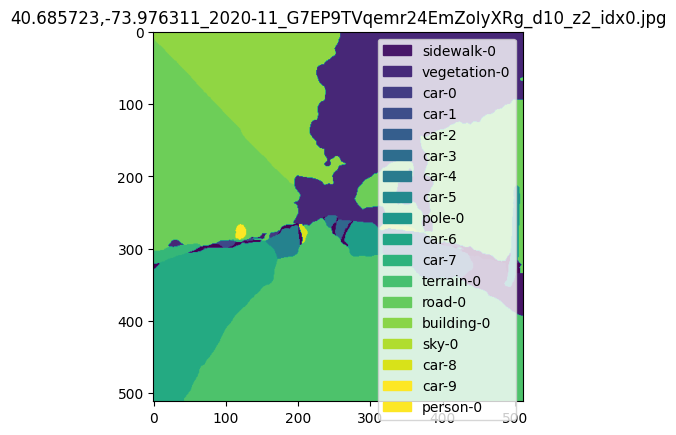

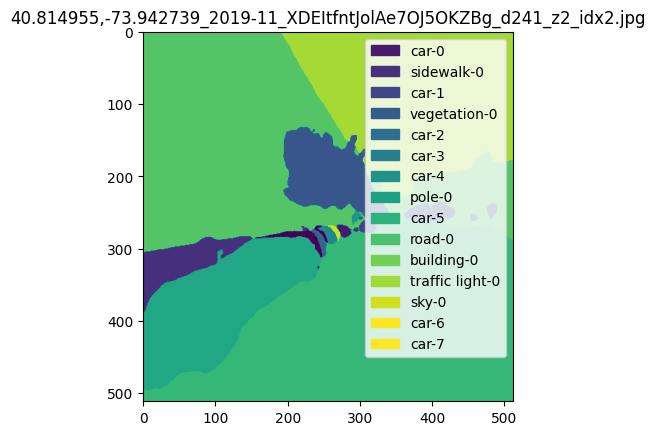

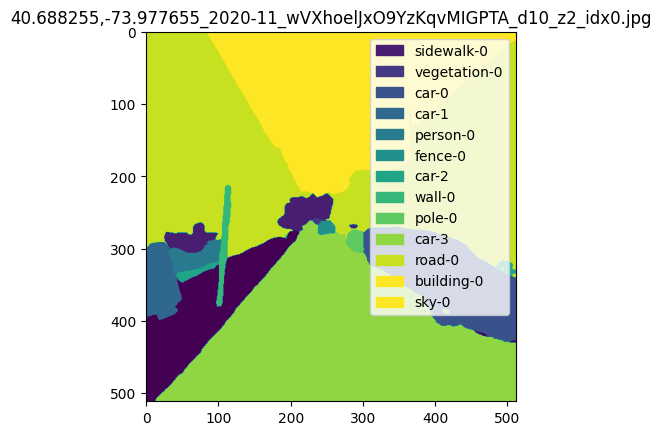

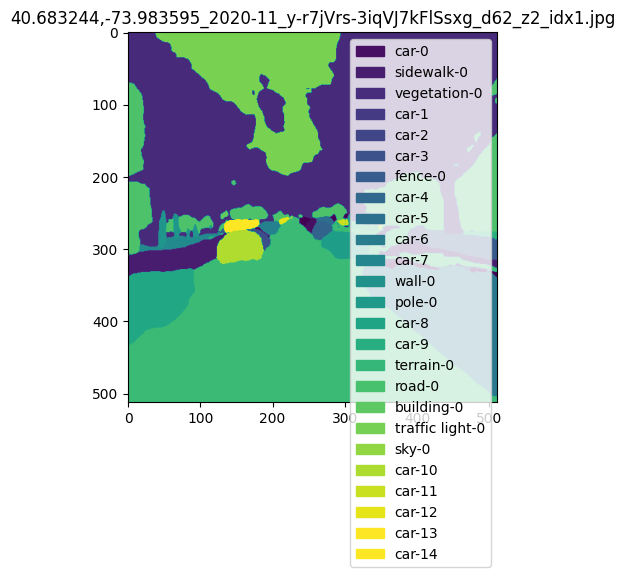

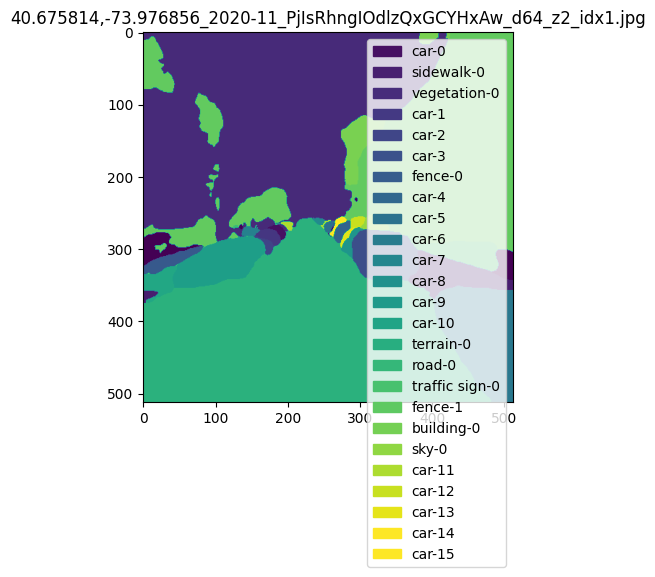

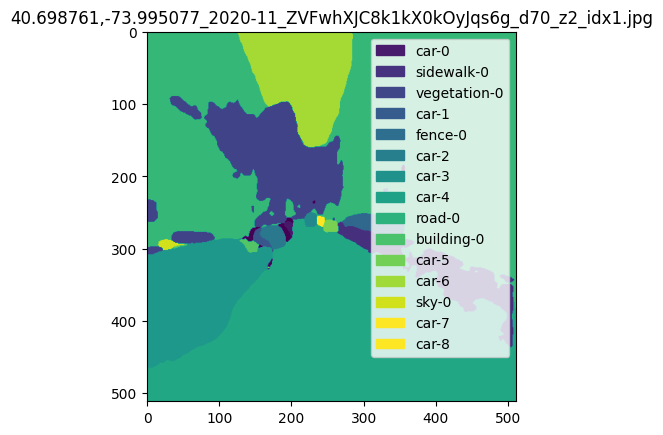

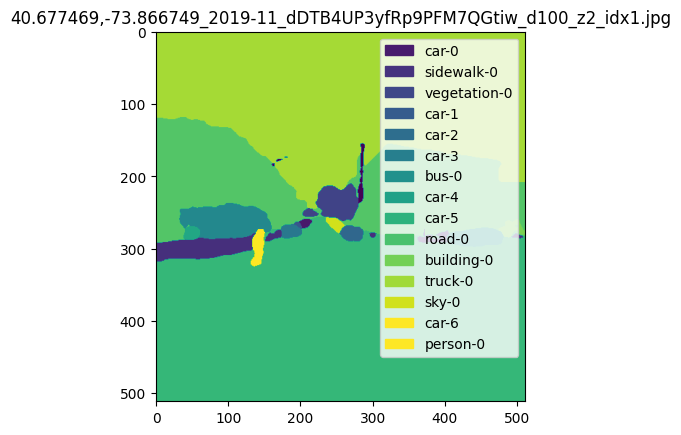

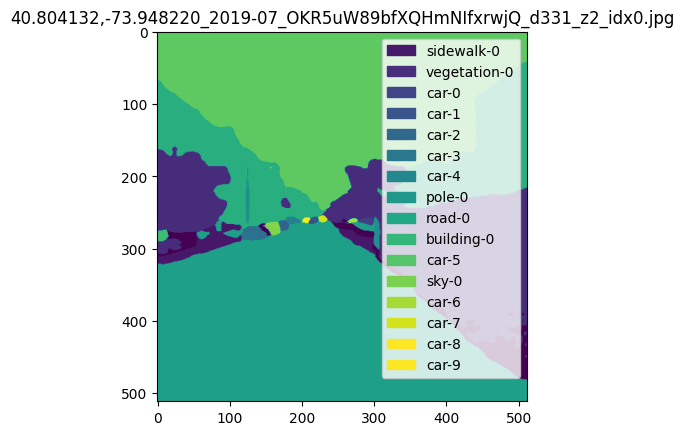

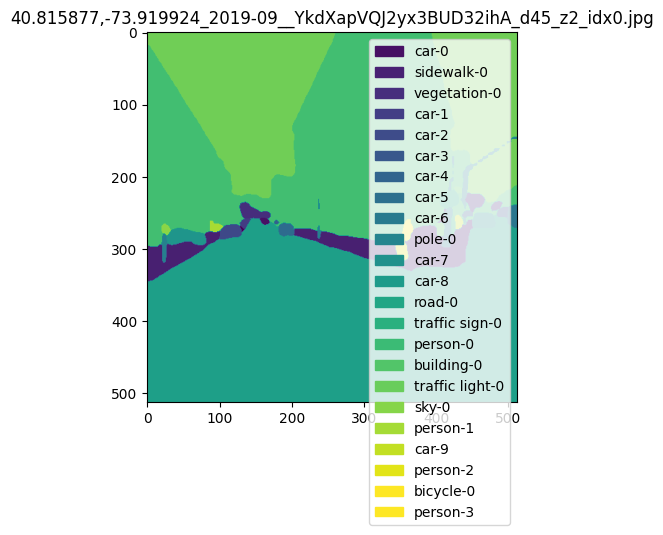

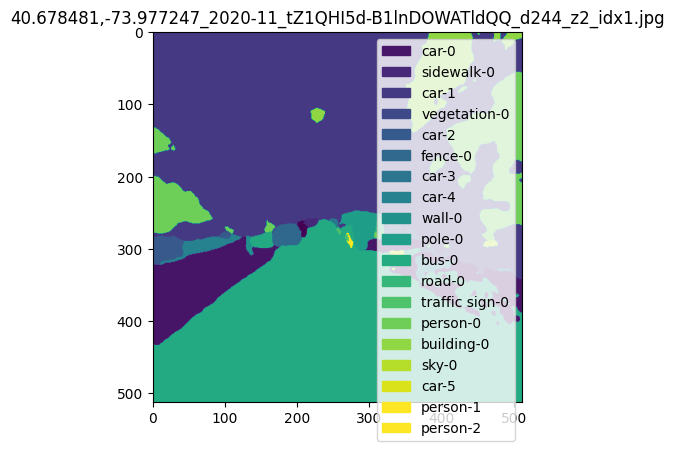

In [ ]:
for img in rs:
  draw_panoptic_segmentation(img['filename'],img['rs']['segmentation'], img['rs']['segments_info'])